<a href="https://colab.research.google.com/github/Ramiassaf/Ramiassaf-Winter_is_coming/blob/main/Games_of_Throne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINTER IS COMING!!**



If you haven't heard of Game of Thrones, then you must be really good at hiding.**Game of Thrones** is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze **The War of the Five Kings dataset** is a collection of data about the battles that took place during the war. The dataset includes information about the name of the battle, the year it took place, the attacking and defending kings, the outcome of the battle, and the type of battle.

**When the snows fall and the white winds blow, the lone wolf dies but the pack survives.**

This is the motto of House Stark, and it is a motto that would be tested to the extreme during the War of the Five Kings. When King Robert Baratheon dies, his kingdom is plunged into chaos as five different men claim the Iron Throne.

Robb Stark, the young and inexperienced King in the North, must unite his people and fight for his family's rightful claim to the throne. Stannis Baratheon, the rightful heir to the throne, must rally his supporters and defeat his enemies. Renly Baratheon, the younger brother of Robert, must prove that he is worthy of the throne. Balon Greyjoy, the King of the Iron Islands, must take advantage of the chaos and win his independence. And Joffrey Baratheon, the illegitimate son of Robert, must hold onto the throne at any cost.

The War of the Five Kings is a story of betrayal, loyalty, love, and loss. It is a story of the power of family and the importance of fighting for what you believe in.

# Improting the needed libraries

In [ ]:
# Loading required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA/battles.csv")


#  Data Overview

In [ ]:
data.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [ ]:
data.shape

(38, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [ ]:
data.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [ ]:
data.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [ ]:
data.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

# Data Cleaning

In [ ]:
# Create a new dataset with the selected columns required for the data analysis.
df=data[['name','attacker_king','defender_king','attacker_outcome','battle_type','major_death','major_capture','attacker_size','defender_size','attacker_commander','defender_commander','location','region']]
df.head()

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
3,Battle of the Green Fork,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Green Fork,The Riverlands
4,Battle of the Whispering Wood,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,Whispering Wood,The Riverlands


In [ ]:
df.shape

(38, 13)

In [ ]:
df.dtypes

name                   object
attacker_king          object
defender_king          object
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
location               object
region                 object
dtype: object

## Working on the null vlaues

In [ ]:
# To avoid settingWithCopyWarning
pd.options.mode.chained_assignment=None

In [ ]:
# Change the data type of the major_death column to boolean.
df['major_death'] = df['major_death'].astype('bool')

In [ ]:
# Change the data type of the major_capture column to boolean.
df['major_capture'] = df['major_capture'].astype('bool')

In [ ]:
print(df[['major_death', 'major_capture']].dtypes)


major_death      bool
major_capture    bool
dtype: object


In [ ]:
df.isnull().sum()

name                   0
attacker_king          2
defender_king          3
attacker_outcome       1
battle_type            1
major_death            0
major_capture          0
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
location               1
region                 0
dtype: int64

In [ ]:
# Dataset where attacker_king column has null values.
df[df['attacker_king'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,NaN,NaN,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
29,Sack of Saltpans,NaN,NaN,win,razing,False,False,NaN,NaN,Rorge,NaN,Saltpans,The Riverlands


In [ ]:
# Replace all null values in the attacker_king column with 'No King'.
df.fillna({'attacker_king':'No King'},inplace=True)

In [ ]:
# Dataset where defender_king column has null values.
df[df['defender_king'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,NaN,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
24,Retaking of Harrenhal,Joffrey/Tommen Baratheon,NaN,win,pitched battle,True,False,NaN,NaN,Gregor Clegane,Vargo Hoat,Harrenhal,The Riverlands
29,Sack of Saltpans,No King,NaN,win,razing,False,False,NaN,NaN,Rorge,NaN,Saltpans,The Riverlands


In [ ]:
df.fillna({'defender_king':'No King'},inplace=True)

In [ ]:
# Dataset where attacker_outcome column has null values.
df[df['attacker_outcome'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,NaN,NaN,True,True,5000.0,8000.0,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [ ]:
# Replace all null values in the attacker_outcome column with 'loss'.
df.fillna({'attacker_outcome':'loss'},inplace=True)

In [ ]:
# Dataset where battle_type column has null values.
df[df["battle_type"].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
37,Siege of Winterfell,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,NaN,True,True,5000.0,8000.0,Stannis Baratheon,Roose Bolton,Winterfell,The North


In [ ]:
# Replace all null values in the battle_type column with 'siege'.
df.fillna({'battle_type':'siege'},inplace=True)

In [ ]:
# Dataset where attacker_size column has null values.
df[df['attacker_size'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,NaN,120.0,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,NaN,NaN,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,NaN,NaN,Victarion Greyjoy,NaN,Moat Cailin,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,NaN,NaN,Dagmer Cleftjaw,NaN,Torrhen's Square,The North
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,NaN,NaN,Helman Tallhart,NaN,Darry,The Riverlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,NaN,NaN,NaN,NaN,NaN,The Riverlands
23,Battle of the Ruby Ford,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,NaN,6000.0,Gregor Clegane,"Roose Bolton, Wylis Manderly",Ruby Ford,The Riverlands
24,Retaking of Harrenhal,Joffrey/Tommen Baratheon,No King,win,pitched battle,True,False,NaN,NaN,Gregor Clegane,Vargo Hoat,Harrenhal,The Riverlands
26,Siege of Seagard,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,True,NaN,NaN,Walder Frey,Jason Mallister,Seagard,The Riverlands
28,Fall of Moat Cailin,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,win,siege,False,False,NaN,NaN,Ramsey Bolton,NaN,Moat Cailin,The North


Mean/Median Imputation: Calculate the mean or median of the non-null values in the "attacker_size" column and use that value to fill in the missing entries. This is a simple approach that assumes the missing values are randomly distributed.

In [ ]:
# Sum of all values of attacker_size of the dataset.
attacker_size_sum=df.attacker_size.sum()
print("the number of null values are",attacker_size_sum)
# Average of attacker_size column of the dataset.
average=attacker_size_sum/38
print("the average is",average)

the number of null values are 238621.0
the average is 6279.5


In [ ]:
# Replace all null values in the attacker_size column with 6280.
df.fillna({'attacker_size':6280},inplace=True)

In [ ]:
# Sum of all values of defender_size of the dataset.
defender_size_sum=df.defender_size.sum()
print("the number of null values are",defender_size_sum)
# Average of attacker_size column of the dataset.
average=defender_size_sum/38
print("the average is",average)

the number of null values are 122135.0
the average is 3214.0789473684213


In [ ]:
# Replace all null values in the attacker_size column with 6280.
df.fillna({'defender_size':3214},inplace=True)

In [ ]:
# Dataset where attacker_commander column has null values.
df[df['attacker_commander'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,NaN,NaN,NaN,The Riverlands


In [ ]:
# Dataset where defender_commander column has null values.
df[df['defender_commander'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280.0,3214.0,Victarion Greyjoy,NaN,Moat Cailin,The North
8,Battle of Deepwood Motte,Balon/Euron Greyjoy,Robb Stark,win,siege,False,False,1000.0,3214.0,Asha Greyjoy,NaN,Deepwood Motte,The North
9,Battle of the Stony Shore,Balon/Euron Greyjoy,Robb Stark,win,ambush,False,False,264.0,3214.0,Theon Greyjoy,NaN,Stony Shore,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,6280.0,3214.0,Dagmer Cleftjaw,NaN,Torrhen's Square,The North
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280.0,3214.0,Helman Tallhart,NaN,Darry,The Riverlands
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,NaN,NaN,NaN,The Riverlands
28,Fall of Moat Cailin,Joffrey/Tommen Baratheon,Balon/Euron Greyjoy,win,siege,False,False,6280.0,3214.0,Ramsey Bolton,NaN,Moat Cailin,The North
29,Sack of Saltpans,No King,No King,win,razing,False,False,6280.0,3214.0,Rorge,NaN,Saltpans,The Riverlands
31,Battle of the Shield Islands,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,win,pitched battle,False,False,6280.0,3214.0,"Euron Greyjoy, Victarion Greyjoy",NaN,Shield Islands,The Reach
32,"Invasion of Ryamsport, Vinetown, and Starfish ...",Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,win,razing,False,False,6280.0,3214.0,"Euron Greyjoy, Victarion Greyjoy",NaN,"Ryamsport, Vinetown, Starfish Harbor",The Reach


In [ ]:
# Replace all null values in the attacker_commander and defender_commander columns with 'No Commander'.
df.fillna({'attacker_commander':'No Commander','defender_commander':'No Commander'},inplace=True)

In [ ]:
# Dataset where location column has null values.
df[df['location'].isnull()]

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
22,Battle of the Burning Septry,No King,No King,win,pitched battle,False,False,6280.0,3214.0,No Commander,No Commander,NaN,The Riverlands


In [ ]:
# Replace all null values in the location column with 'Riverrun'.
df.fillna({'location':'Riverrun'},inplace=True)

In [ ]:
df.isnull().sum()

name                  0
attacker_king         0
defender_king         0
attacker_outcome      0
battle_type           0
major_death           0
major_capture         0
attacker_size         0
defender_size         0
attacker_commander    0
defender_commander    0
location              0
region                0
dtype: int64

In [ ]:
# Change the datatype of attacker_size column into int.
df['attacker_size'] = df['attacker_size'].apply(int)

In [ ]:
# Change the datatype of defender_size column into int.
df['defender_size'] = df['defender_size'].apply(int)

# Data Visualization

## A Visual History

Text(0.5, 1.0, 'The War of the Five Kings: A Visual History')

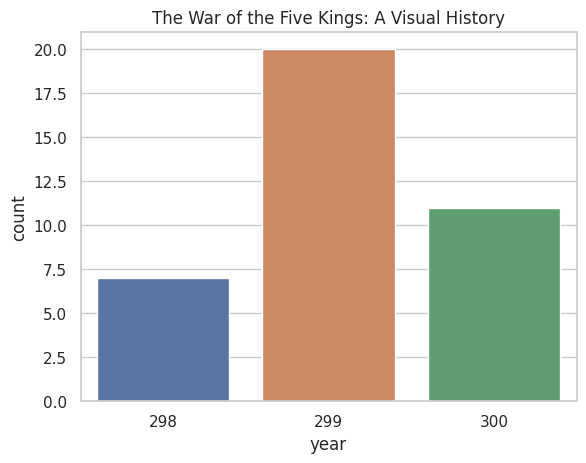

In [ ]:
g = sns.countplot(x="year", data=data)

# Add title to the plot
g.set_title("The War of the Five Kings: A Visual History")

## Which king launches the greatest number of offensives?

Text(0.5, 1.0, 'Attacks by Attacker Kings in the War of the Five Kings')

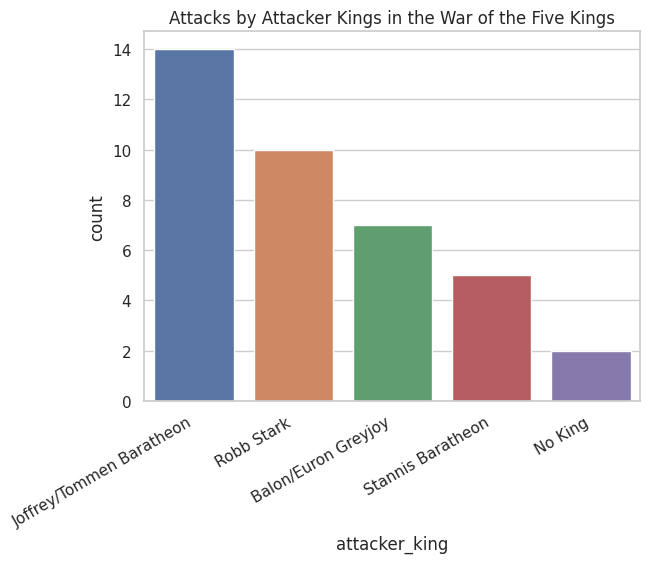

In [ ]:
# Top 5 attacker kings who attack most times, and count of attack also given.
g = sns.countplot(x="attacker_king", data=df)

# Rotate x-axis labels by 30 degrees for better visibility
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha="right")

# Set a new title for the plot
g.set_title("Attacks by Attacker Kings in the War of the Five Kings")

## Aggregate Attacker Forces by King


<ipython-input-112-72d5e39b03a6>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




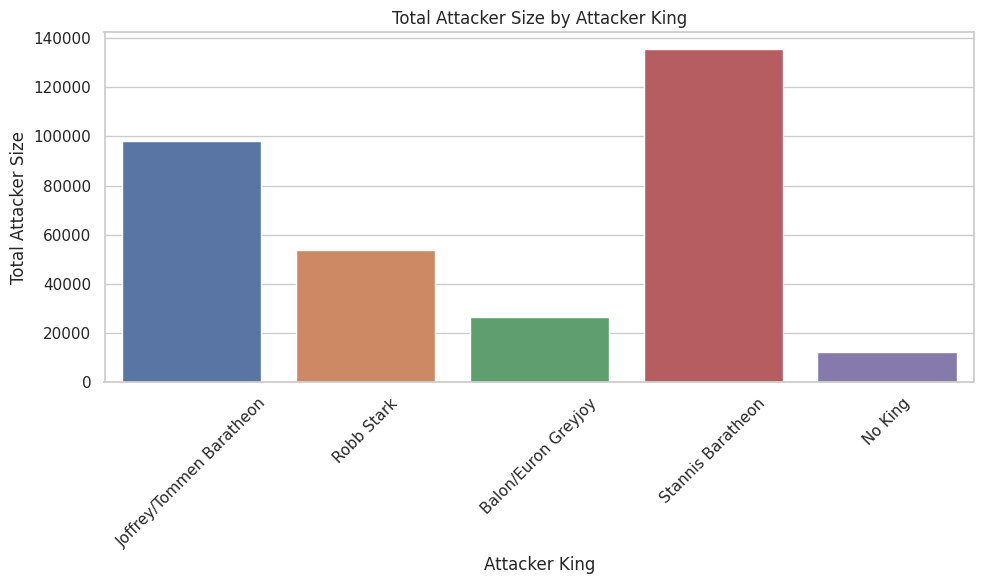

In [ ]:
# Assuming you have already imported your dataset and extracted 'attacker_king' and 'attacker_size' columns
att_with_most = df[['attacker_king', 'attacker_size']]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=att_with_most, x='attacker_king', y='attacker_size', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.xlabel('Attacker King')
plt.ylabel('Total Attacker Size')
plt.title('Total Attacker Size by Attacker King')
plt.tight_layout()

# Show the plot
plt.show()


## Aggregate Defender Forces by King


<ipython-input-113-2d001d7e34ce>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




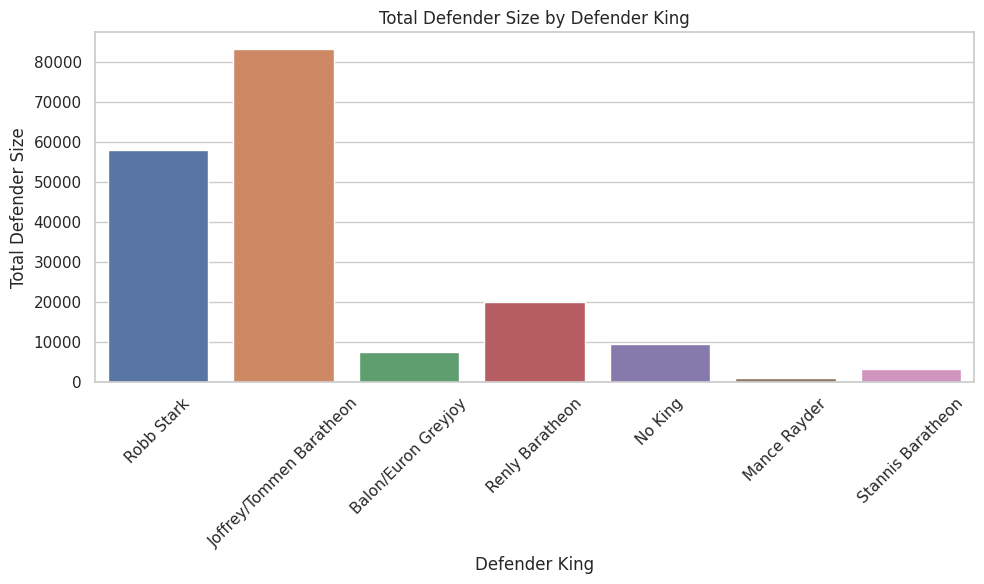

In [ ]:
# Assuming you have already imported your dataset and extracted 'defender_king' and 'defender_size' columns
def_with_most = df[['defender_king', 'defender_size']]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=def_with_most, x='defender_king', y='defender_size', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.xlabel('Defender King')
plt.ylabel('Total Defender Size')
plt.title('Total Defender Size by Defender King')
plt.tight_layout()

# Show the plot
plt.show()


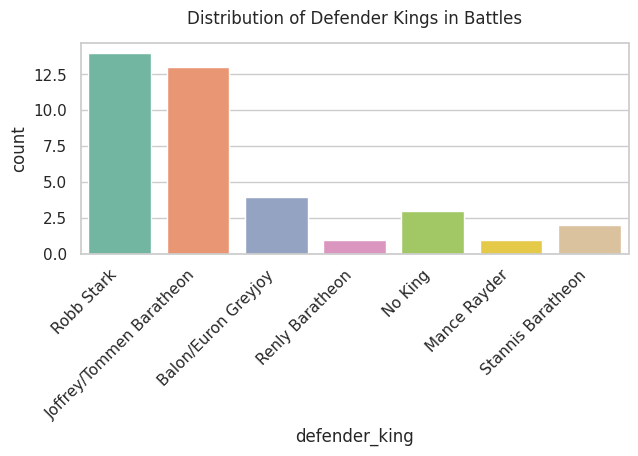

In [ ]:
# Create a countplot with 'defender_king' on the x-axis
g = sns.countplot(x="defender_king", data=df, palette="Set2")

# Add a more representative title to the plot
g.set_title("Distribution of Defender Kings in Battles", y=1.05)

# Increase the spacing between the x-axis labels and rotate them for readability
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()



## Conqueror's Chronicle: Attacker Outcomes Across Kingdoms

Text(0.5, 1.0, 'Attacker Outcome Frequencies')

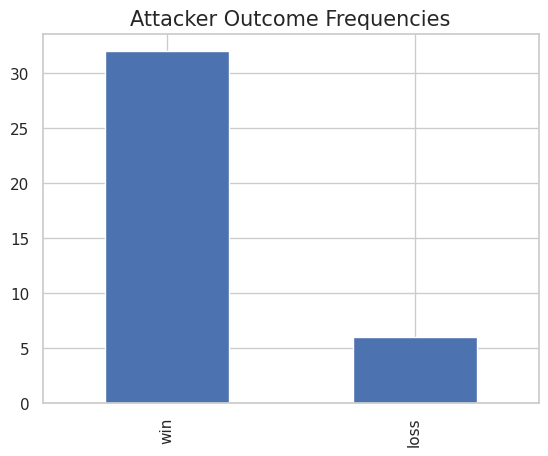

In [ ]:
# Count the number of observations for each value, then make a bar plot
df['attacker_outcome'].value_counts().plot(kind='bar')
plt.title('Attacker Outcome Frequencies',fontsize=15)

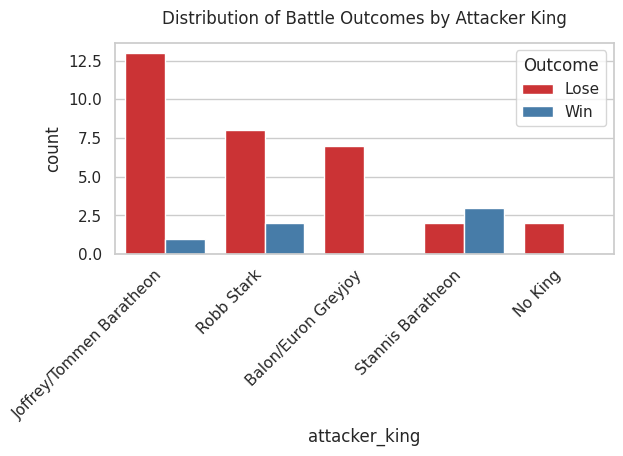

In [ ]:
# Create a countplot with 'attacker_king' on the x-axis and 'attacker_outcome' as hue
g = sns.countplot(x="attacker_king", hue="attacker_outcome", data=df, palette="Set1")

# Rename the legend labels
g.legend(title="Outcome", labels=["Lose", "Win"])

# Add a title to the plot
g.set_title("Distribution of Battle Outcomes by Attacker King", y=1.05)

# Increase the spacing between the x-axis labels and rotate them for readability
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named df
fig = px.sunburst(df, path=['attacker_king', 'defender_king', 'region'], color='attacker_outcome')

# Add a suitable title to the sunburst chart
fig.update_layout(title_text='Sunburst Chart of Battle Outcomes by Attacker and Defender Kings', showlegend=True)

fig.show()


## Royal Rivals: Attacker Kings and Battle Strategie

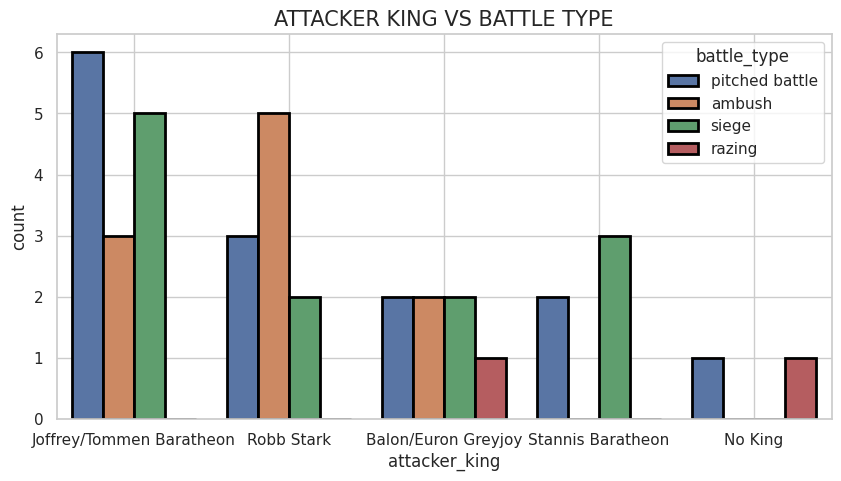

In [ ]:
# Count-plot bw "attacker_king" and "battle_type"
y=df["battle_type"]
plt.figure(figsize=(10,5))
sns.countplot(x=df["attacker_king"],hue=y,data=df,ec='black',lw=2)
plt.title('ATTACKER KING VS BATTLE TYPE',fontsize=15)
plt.grid(True)
plt.show()

## War Zones Unveiled: Battles, Regions, and Strategies in the War of the Five Kings

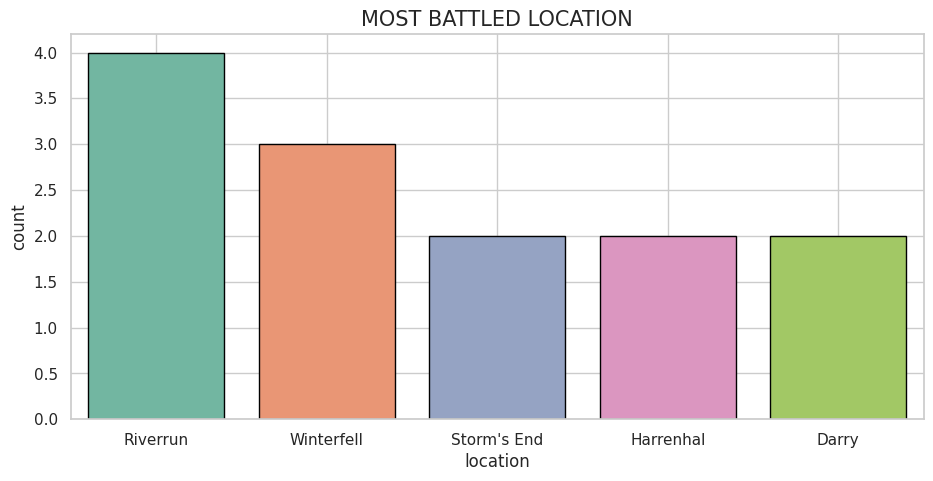

In [ ]:
# Count-plot of top 5 most battled location.
plt.figure(figsize=(11,5))
sns.countplot(x='location',order=df["location"].value_counts().index[0:5],data=df,palette = "Set2",ec='black',lw=1)
plt.title('MOST BATTLED LOCATION',fontsize=15)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Number of Battles in Each Region during the War of the Five Kings')

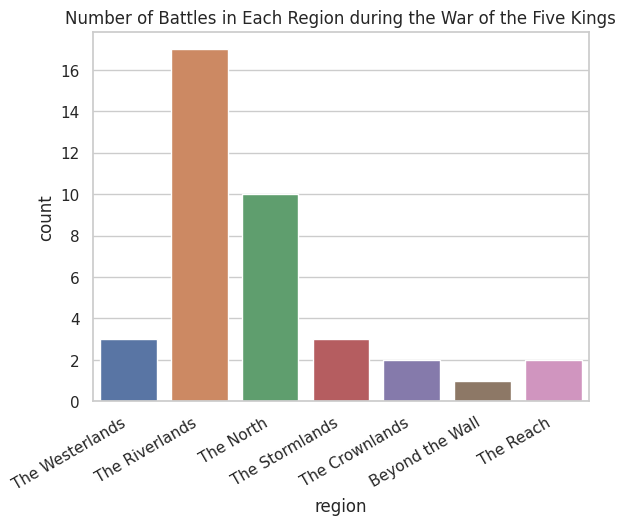

In [ ]:
# Battles in Each Region during the War of the Five Kings.
g = sns.countplot(x="region", data=df)

# Rotate x-axis labels by 30 degrees for better visibility
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha="right")

# Set a new title for the plot
g.set_title("Number of Battles in Each Region during the War of the Five Kings")


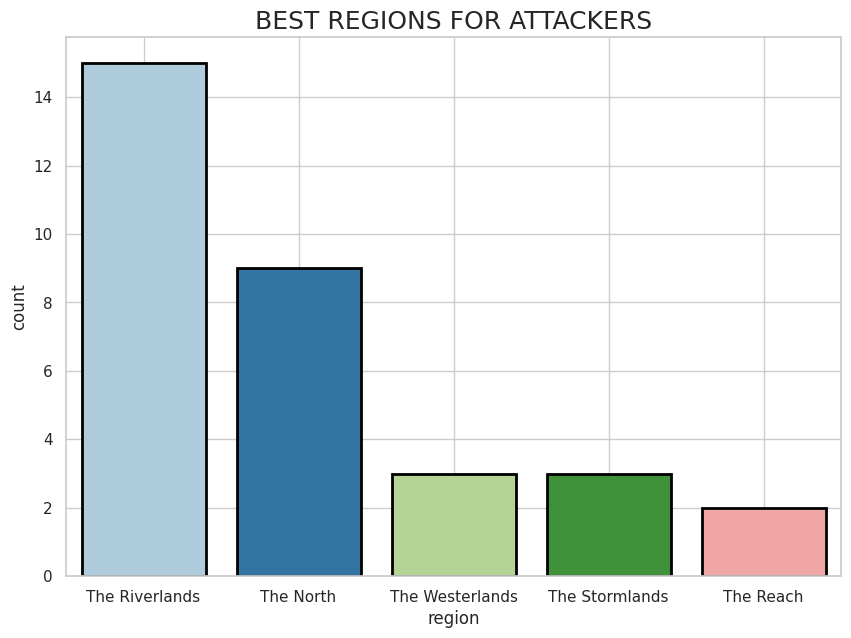

In [ ]:
# Make a dataset a where we have only three columns attacker_king, attacker_outcome and region from the battles dataset.
a=df[['attacker_king','attacker_outcome','region']]
a=a[a['attacker_outcome']=='win']
# Count-plot for the regions where the attacker kings wins most number of battles.
plt.figure(figsize=(10,7))
sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "Paired",ec='black',lw=2)
plt.title('BEST REGIONS FOR ATTACKERS',fontsize=18)
plt.grid(True)
plt.show()

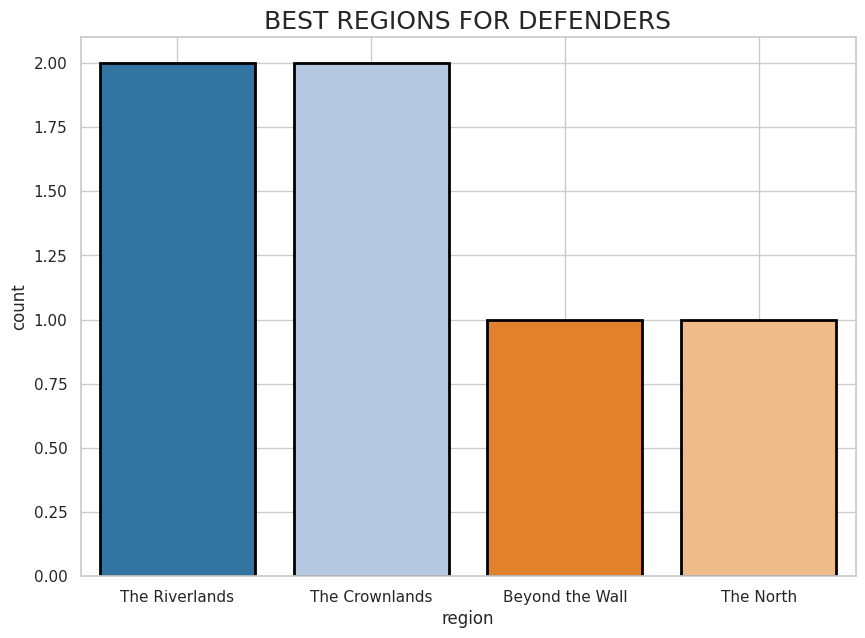

In [ ]:
# Make a dataset a where we have only three columns attacker_king, attacker_outcome and region from the battles dataset.
a=df[['defender_king','attacker_outcome','region']]
# Dataset a where attacker_outcome column is equal to loss.
a=a[a['attacker_outcome']=='loss']
# Count-plot for the regions where the defender kings wins most number of battles.
plt.figure(figsize=(10,7))
sns.countplot(x='region',order=a['region'].value_counts().index[0:15],data=a,palette = "tab20",ec='black',lw=2)
plt.title('BEST REGIONS FOR DEFENDERS',fontsize=18)
plt.grid(True)
plt.show()

## Battleground Balance: The Impact of Attacker-Defender Disparities on Battle Outcomes

In [ ]:
# Create a dataset where attacker_size is greater than the defender size of the battle dataset..
a=df[df['attacker_size'] > df['defender_size']]
a

,name,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,location,region
0,Battle of the Golden Tooth,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,True,False,15000,4000,Jaime Lannister,"Clement Piper, Vance",Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,True,False,6280,120,Gregor Clegane,Beric Dondarrion,Mummer's Ford,The Riverlands
2,Battle of Riverrun,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,True,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Riverrun,The Riverlands
6,Sack of Darry,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,False,False,6280,3214,Gregor Clegane,Lyman Darry,Darry,The Riverlands
7,Battle of Moat Cailin,Balon/Euron Greyjoy,Robb Stark,win,pitched battle,False,False,6280,3214,Victarion Greyjoy,No Commander,Moat Cailin,The North
12,Sack of Torrhen's Square,Balon/Euron Greyjoy,Balon/Euron Greyjoy,win,siege,False,True,6280,3214,Dagmer Cleftjaw,No Commander,Torrhen's Square,The North
16,Battle of the Fords,Joffrey/Tommen Baratheon,Robb Stark,loss,pitched battle,False,False,20000,10000,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",Red Fork,The Riverlands
18,Battle of the Crag,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,False,False,6000,3214,"Robb Stark, Smalljon Umber, Black Walder Frey",Rolph Spicer,Crag,The Westerlands
19,Battle of the Blackwater,Stannis Baratheon,Joffrey/Tommen Baratheon,loss,pitched battle,True,True,21000,7250,"Stannis Baratheon, Imry Florent, Guyard Morrig...","Tyrion Lannister, Jacelyn Bywater, Sandor Cleg...",King's Landing,The Crownlands
20,Siege of Darry,Robb Stark,Joffrey/Tommen Baratheon,win,siege,False,False,6280,3214,Helman Tallhart,No Commander,Darry,The Riverlands


In [ ]:
# Count of the attacker_outcome column of the dataset a.
a['attacker_outcome'].value_counts()

win     18
loss     3
Name: attacker_outcome, dtype: int64

In [ ]:
# Percentage of winning the battle, if the size of the attacker army is greater than the size of the defender army.
18/21*100

85.71428571428571

In [ ]:
# Count of battle wins and battle loss.
y=list(a['attacker_outcome'].value_counts())
y

[18, 3]

In [ ]:
# attacker_outcome column's values of the dataset a in the list.
x=list(a['attacker_outcome'].value_counts().keys())
x

['win', 'loss']

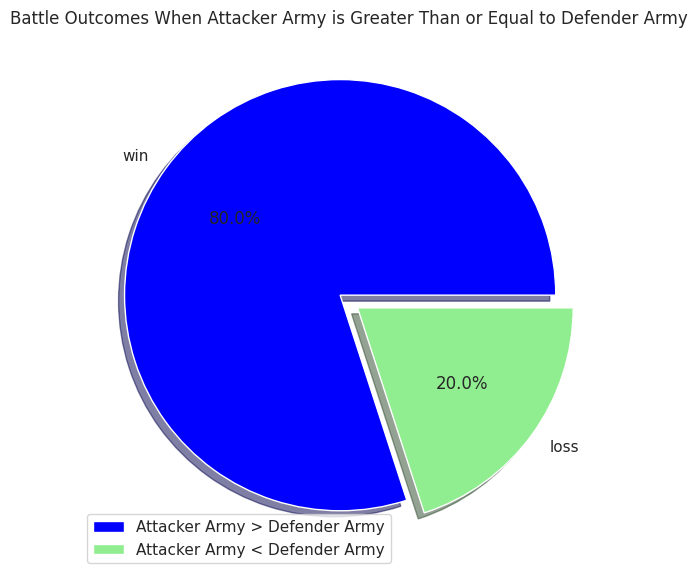

In [ ]:
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is greater than the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05, 0.05]
mycolors = ["blue", "lightgreen"]
# Create the pie chart
plt.pie(y, labels=x, autopct='%0.1f%%', explode=myexplode, shadow=True, colors=mycolors)
# Add a legend with labels
plt.legend(labels=["Attacker Army > Defender Army", "Attacker Army < Defender Army"], loc='best')
# Set the title
plt.title("Battle Outcomes When Attacker Army is Greater Than or Equal to Defender Army")
# Display the plot
plt.show()







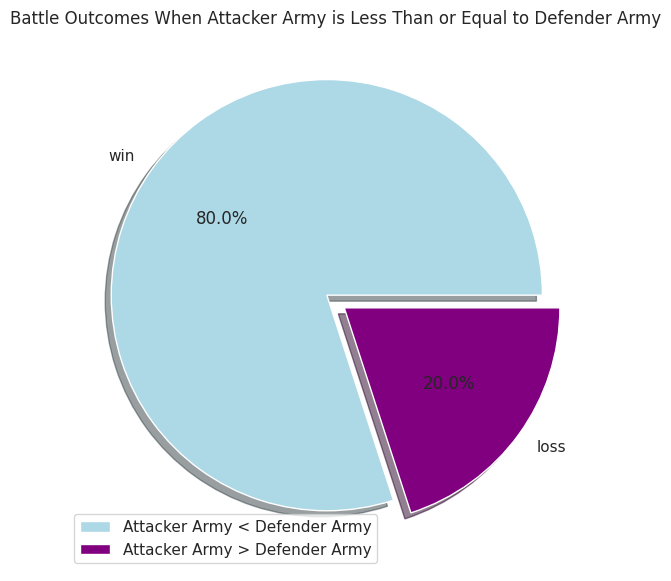

In [ ]:
# Create a dataset where attacker_size is less than the defender size of the battle dataset..
a=df[df['attacker_size'] < df['defender_size']]
y=list(a['attacker_outcome'].value_counts())
x=list(a['attacker_outcome'].value_counts().keys())
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is greater than the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05, 0.05]
mycolors = ["lightblue", "purple"]
# Create the pie chart
plt.pie(y, labels=x, autopct='%0.1f%%', explode=myexplode, shadow=True, colors=mycolors)
# Add a legend with labels
plt.legend(labels=["Attacker Army < Defender Army", "Attacker Army > Defender Army"], loc='best')
# Set the title
plt.title("Battle Outcomes When Attacker Army is Less Than or Equal to Defender Army")
# Display the plot
plt.show()


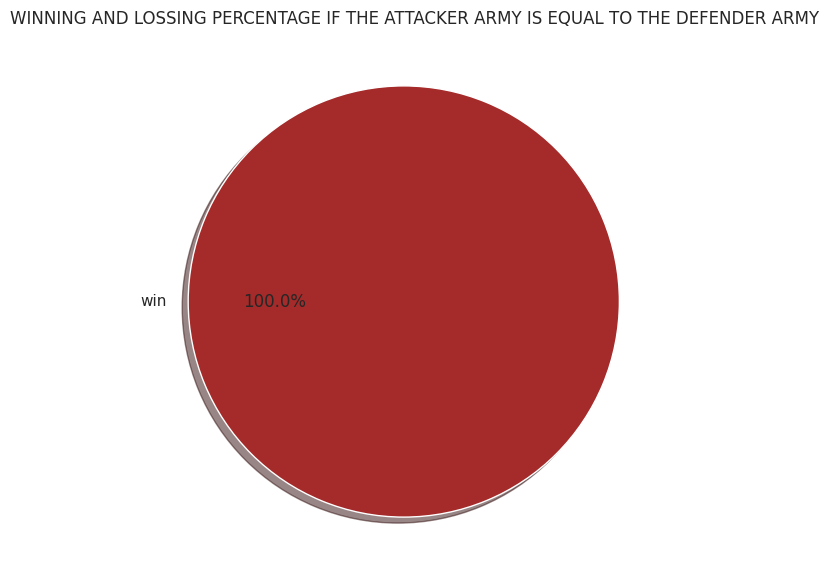

In [ ]:
# Create a dataset where attacker_size is equal to the defender size of the battle dataset..
a=df[df['attacker_size'] == df['defender_size']]
y=list(a['attacker_outcome'].value_counts())
x=list(a['attacker_outcome'].value_counts().keys())
# Pie-chart will tells us about the percentage of winning the battle, if the size of the attacker army is equal to the size of the defender army.
plt.figure(figsize=(7,7))
myexplode = [0.05]
mycolors = ["brown","blue"]
plt.pie(y,labels=x,autopct='%0.1f%%',explode = myexplode,shadow = True,colors=mycolors)
plt.title("WINNING AND LOSSING PERCENTAGE IF THE ATTACKER ARMY IS EQUAL TO THE DEFENDER ARMY")
plt.show()

# Summary
*In the turbulent realm of Game of Thrones, a tale unfolds that spotlights the kings and their strategic prowess on the battlefield.
In this epic saga, it is Joffrey/Tommen Baratheon who seizes the spotlight, launching more offensives than any other monarch. His relentless pursuit of power leads him to command the largest armies in his attacks, with the numbers often tipping the scales in his favor.
Yet, in the midst of this relentless pursuit, the location that witnesses the fiercest clashes is none other than Riverrun. Its hallowed grounds bear witness to the ebb and flow of battles as kings vie for control.
Renly Baratheon, a rival of Joffrey/Tommen, is not far behind in the defender's realm. Together, they hold the line with the mightiest defensive forces, deterring any who dare challenge their dominion.
Pitched battles become the norm in this tumultuous time, as attacking kings strive to carve their mark on history. It's in these intense clashes that Joffrey/Tommen Baratheon shines, emerging victorious more often than not.
Robb Stark, on the other hand, finds himself constantly in the crosshairs of rival kings, enduring more attacks than any of his peers.
But it's not just about the offense; defense proves to be a formidable strategy. Joffrey/Tommen Baratheon stands tall as the most successful defender, with a remarkable 66.7% victory rate in defending his realm.
Interestingly, army size doesn't always dictate the outcome. The battle's fate depends more on strategy and circumstance. When the attacker's forces outnumber the defender, victory favors the attacker 80% of the time. When the roles are reversed, the attacker still prevails in 80% of battles. Remarkably, when the armies are equally matched, the attacker enjoys a flawless record.
These battles reveal a compelling truth - the size of the attacking king's army isn't the sole factor for victory. It's a testament to strategy, cunning, and the unpredictable nature of warfare.
In this war-ravaged land, the Riverlands emerge as the crucible of conquest, where attacking kings seek their fortune and emerge triumphant.
In contrast, The Riverlands and The Crownlands stand as bastions of defense, where defending kings prove their mettle.
In the intricate dance of power and strategy, the Game of Thrones kings leave an indelible mark on the annals of history, where every move is a step closer to victory or defeat*

# Done By:
 ### **Rami Assaf**
---


